### Notes

- Add a markdown cell at the top of this notebook with your name, course number, assignment description, etc.

- Look through all the places where there is `#TODO` text, and do those todo's.

- You may want to reduce `BATCH_SIZE` down to 10 while debugging, then increase back up to 100 or higher to get more accurate results




### Some numpy tips

- to create a numpy array of *n* zero's, use this:

        np.zeros(n)

- numpy is really good at vector arithmetic; e.g.,

        arr = np.array([1.1,2.2,3.3,4.4])
        
        # arithmetic operations are allowed between array and number
        arr2 = arr * 2
        # arr2 becomes [2.2, 4.4, 6.6, 8.8]

        # arithmetic operations are also allowed between array and array
        arr3 = arr + arr2
        # arr3 becomes [-1.1, -2.2, -3.3, -4.4]

- if you want to get argmax of multiple values, use this:

        np.argmax( arrayOfValues )

- if you need *n* random values from a normal distribution, use this:

        np.random.normal(mean, standardDeviation, n)



In [24]:
#Khagendra Khatri
#CS420
#n armed bandit
# install necessary libraries
!pip install -q numpy matplotlib

In [25]:
# load numpy, random, matplotlib
import numpy as np
from random import randrange, random, shuffle
import matplotlib.pyplot as plt

# set numpy print precision to be 2 digits
np.set_printoptions(precision=2)



In [26]:
# create a random-action agent
class RandomAgent:
    # initialize agent by passing number of possible actions that this agent can take
    def __init__(self, numberOfPossibleActions):
        # save number of possible actions
        self.actions = numberOfPossibleActions
        self.reset()
    
    # the environment will call agent's reset() function prior to every new run
    def reset(self):
        # this is a dumb random agent, so we have no code here
        pass
    
    # the environment will call agent's step() function on every turn
    #   the expected output will be the action (an integer between 0 and numberOfPossibleActions)
    def step(self):
        # return random action
        return randrange( self.actions )

    # the environment will call agent's feedback(reward) function after every step
    #   so as to provide reward feedback
    def feedback(self, reward):
        # this is a dumb random agent that doesn't learn from feedback, so we have no code here
        pass

    # create a label for this agent
    def label(self):
        return "rand"


In [27]:
# create a Reinforcement Learning agent
class RL:
    # initialize agent by passing number of possible actions that this agent can take, as well as learning rate and exploration parameters
    def __init__(self, numberOfPossibleActions, learningRate = .1, potentialToExplore = .1):
        self.numberOfPossibleActions = numberOfPossibleActions
        self.learningRate = learningRate
        self.potentialToExplore = potentialToExplore
        self.reset()
    
    # the environment will call agent's reset() function prior to every new run
    def reset(self):
        #TODO: set up agent memory (and get rid of the pass statement below)
        self.mem = np.zeros(self.numberOfPossibleActions)
        pass

    # the environment will call agent's step() function on every turn
    #   the expected output will be the action (an integer between 0 and numberOfPossibleActions)
    def step(self):
        # choose the best action
        #TODO: change statement below to choose action based on highest expected reward (i.e., check memory to see which action was most successful in the past)
        #TODO: add code to use the potentialToExplore parameter for some exploration-exploitation tradeoffs
        if random() < self.potentialToExplore:
            self.actionTaken = randrange(self.numberOfPossibleActions)
        else:
            self.actionTaken = np.argmax(self.mem)
        # return chosen action
        return self.actionTaken

    def feedback(self, reward):
        #TODO: update memory based on feedback (and get rid of the pass statement below)
        #   Add code to change expected value of self.actionTaken (i.e., last taken action) based on reward.
        #   You can just track the average reward for each action in agent memory,
        #      but it'd be even better if you used error-driven learning,
        #      where expected value of action, Q, is changed based on difference between itself and reward, multiplied by learningRate:
        #          Q = Q + lr * ( reward - Q )
        self.mem[self.actionTaken] += self.learningRate * (reward - self.mem[self.actionTaken])
        
    
    # create a label for this agent
    def label(self):
        # return text label with learning rate and exploratory parameters
        return f"RL(ɑ:{self.learningRate},ɛ:{self.potentialToExplore})"


In [28]:
def nArmedBandit(agent, rewardProbabilities, steps = 200, bins = 20):
    # we're going to keep track of all the rewards
    rewardHistory = []
    # run agent for a given number of steps
    for step in range(steps):
        # get agent's action
        chosenAction = agent.step()
        # reward probability is based on agent's action
        rewardProbability = rewardProbabilities[ chosenAction ]
        # randomly give reward, or not, based on rewardProbability
        if random() < rewardProbability:
            # give reward
            agent.feedback( 1 )
            rewardHistory.append(step)
        else:
            # do not give reward (i.e., give reward of zero)
            agent.feedback( 0 )
            # rewardHistory.append(0)
    return np.histogram(rewardHistory, bins, (0, steps) )[0]


In [29]:
def nArmedBanditBatch(agent, rewardProbabilities, steps = 200, bins = 20, n=100):
    print('running batch for '+agent.label()+'...',end=' ')
    scores = []
    for i in range(n):
        agent.reset()
        shuffle(rewardProbabilities)
        scores.append( nArmedBandit(agent, rewardProbabilities, steps, bins) )
    print('done.')
    return np.array(scores).mean(0)


In [30]:
# 4 actions problem -- actions give rewards with probabilities of .3, .7, .5, and .1
#   (action 1 is best, giving a reward with probability of .7)
ACTION_REWARDS = [.3, .7, .5, .1]
ACTIONS = len(ACTION_REWARDS)

# going to run n-armed bandit 1000 steps for each agent
STEPS = 2000

# will be averaging over bins of size 10
BINS = 10

# going to run each agent 100 times
BATCH_SIZE = 500

#TODO: change around the agents and arguments below, add or remove agents, see how that changes the results
# create agents
agents=[
    RandomAgent( ACTIONS ),
    RL( ACTIONS, learningRate=.5, potentialToExplore=0.1 ),
    RL( ACTIONS, learningRate=.1, potentialToExplore=0.1 ),
    RL( ACTIONS, learningRate=.01, potentialToExplore=0.1 ),
    RL( ACTIONS, learningRate=.005, potentialToExplore=0.1 ),
]

# run all the agents
scores=[ nArmedBanditBatch(agent, ACTION_REWARDS, STEPS, BINS, BATCH_SIZE) for agent in agents ]

running batch for rand... done.
running batch for RL(ɑ:0.5,ɛ:0.1)... done.
running batch for RL(ɑ:0.1,ɛ:0.1)... done.
running batch for RL(ɑ:0.01,ɛ:0.1)... done.
running batch for RL(ɑ:0.005,ɛ:0.1)... done.


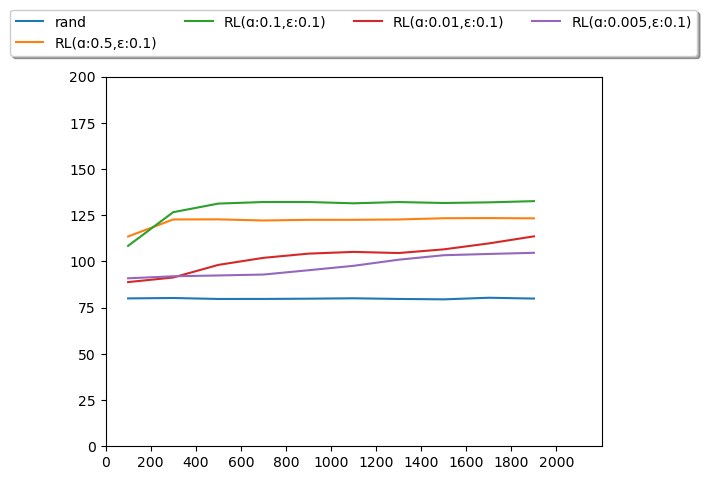

In [31]:
# plot results
plt.ylim(0, STEPS/BINS)
plt.xlim(-0.5,BINS+0.5)
plt.xticks(np.arange(BINS+1)-0.5, np.arange(0,STEPS+1,STEPS/BINS,int))

for i in range(len(agents)):
    plt.plot(scores[i], label = agents[i].label())

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=4, fancybox=True, shadow=True)
